In [84]:
import numpy as np
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
import astropy.units as u
from functools import reduce

# Cleaning the Data Set

In [3]:
df = pd.read_csv('Master_Data_SubPercent.csv')
df

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
4,1-6,2458582.084,0.444742,0.229150,0.343507,0.331258,0.447313,0.001668,0.000677,0.001481,0.002146,0.002117,0.37506,0.29556,0.43118,0.64789,0.47336
5,1-7,2458583.062,0.468402,0.227647,0.339019,0.336703,0.448226,0.002702,0.000909,0.002671,0.001980,0.003198,0.57689,0.39940,0.78780,0.58796,0.71349
6,2-1,2458588.105,0.458164,0.228148,0.337959,0.331605,0.454798,0.001376,0.001231,0.002036,0.001133,0.001965,0.30025,0.53958,0.60235,0.34167,0.43208
7,2-2,2458589.132,0.472849,0.230992,0.338817,0.326235,0.456242,0.002126,0.000892,0.001412,0.002660,0.001972,0.44967,0.38623,0.41668,0.81548,0.43225
8,2-3,2458590.116,0.450350,0.230814,0.339740,0.329479,0.451512,0.003151,0.000832,0.001215,0.002205,0.002620,0.69968,0.36064,0.35766,0.66933,0.58033
9,2-4,2458591.100,0.456375,0.231722,0.341356,0.328269,0.449798,0.001974,0.000789,0.002041,0.001203,0.001656,0.43244,0.34040,0.59781,0.36656,0.36824


Text(0, 0.5, 'Flux')

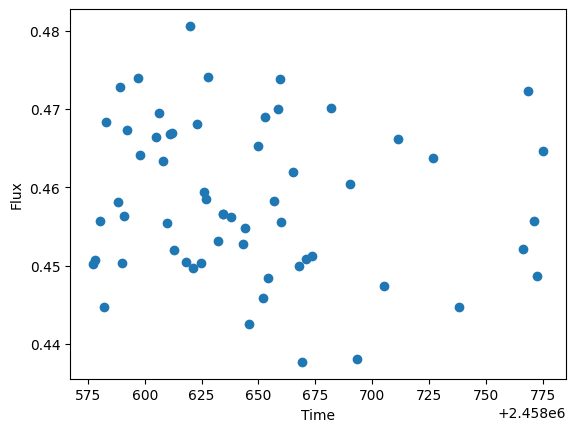

In [4]:
time = df['JD_UTC']
flux = df['av_rel_flux T1']
error = df['std_T1']
comp = df["av_rel_flux C2"]

plt.scatter(time, flux)

plt.xlabel('Time')
plt.ylabel('Flux')

# Phase Folding

Text(0, 0.5, 'Flux')

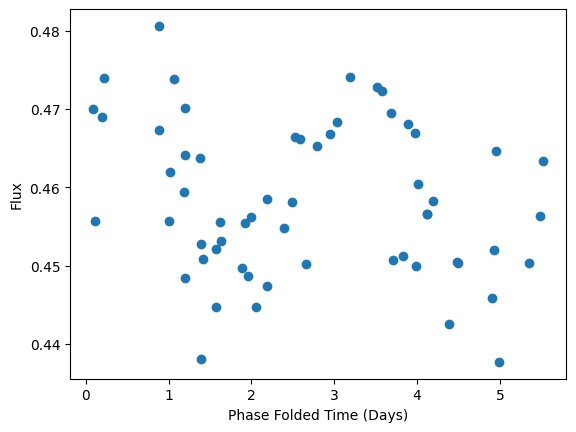

In [5]:
phase_folded_time = time % 5.598
# https://astronomy.stackexchange.com/questions/49579/how-do-i-phase-fold-the-light-curve-for-a-variable-star
# phase folded time is just t % P

plt.figure()

plt.scatter(phase_folded_time, flux)
plt.xlabel("Phase Folded Time (Days)")
plt.ylabel("Flux")

# Lomb-Scargle Periodogram w/ All Data

In [6]:
ls, power = LombScargle(time, flux, nterms = 2).autopower()

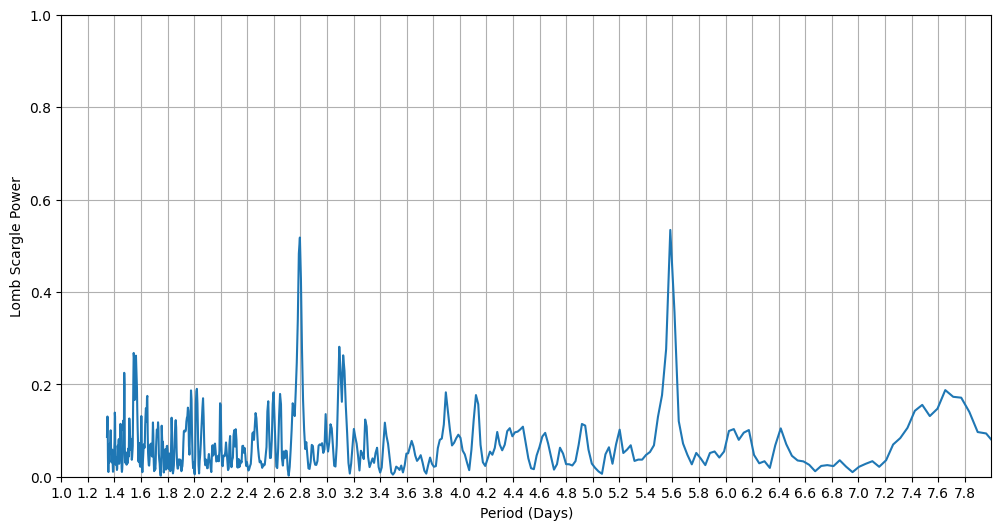

In [7]:
plt.figure(figsize = (12,6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/ls, power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [32]:
cyg_dict = {"Period": 1/ls, "Power": power}

cyg_df = pd.DataFrame(cyg_dict)
cyg_df_filtered = cyg_df.where(cyg_df["Period"] <= 8).dropna().sort_values(by = "Power", ascending = False).head(10)
cyg_df_filtered
# restrict this so period is between 1-8

,Period,Power
177,5.584000,0.534185
354,2.795938,0.517735
355,2.788073,0.482930
353,2.803847,0.427802
176,5.615637,0.355750
356,2.780252,0.338470
320,3.092543,0.281278
178,5.552717,0.276420
352,2.811801,0.275074
641,1.545066,0.267912


# LS on Q1

In [9]:
q1 = df.iloc[np.arange(0,14), :]
q1

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
4,1-6,2458582.084,0.444742,0.229150,0.343507,0.331258,0.447313,0.001668,0.000677,0.001481,0.002146,0.002117,0.37506,0.29556,0.43118,0.64789,0.47336
5,1-7,2458583.062,0.468402,0.227647,0.339019,0.336703,0.448226,0.002702,0.000909,0.002671,0.001980,0.003198,0.57689,0.39940,0.78780,0.58796,0.71349
6,2-1,2458588.105,0.458164,0.228148,0.337959,0.331605,0.454798,0.001376,0.001231,0.002036,0.001133,0.001965,0.30025,0.53958,0.60235,0.34167,0.43208
7,2-2,2458589.132,0.472849,0.230992,0.338817,0.326235,0.456242,0.002126,0.000892,0.001412,0.002660,0.001972,0.44967,0.38623,0.41668,0.81548,0.43225
8,2-3,2458590.116,0.450350,0.230814,0.339740,0.329479,0.451512,0.003151,0.000832,0.001215,0.002205,0.002620,0.69968,0.36064,0.35766,0.66933,0.58033
9,2-4,2458591.100,0.456375,0.231722,0.341356,0.328269,0.449798,0.001974,0.000789,0.002041,0.001203,0.001656,0.43244,0.34040,0.59781,0.36656,0.36824


Text(0, 0.5, 'Normalized Flux')

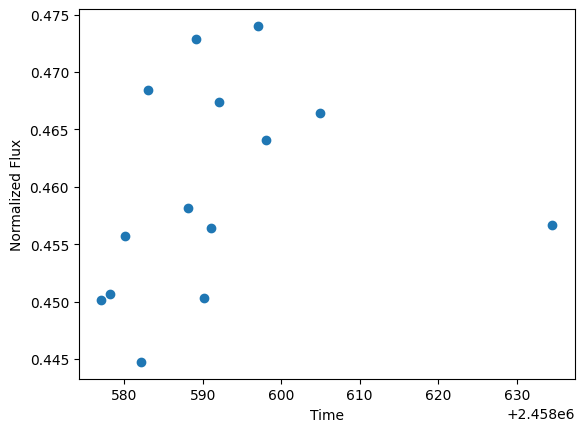

In [10]:
q1_time = q1['JD_UTC'] # time
q1_flux = q1['av_rel_flux T1']  # signal
q1_error = q1['std_T1']

plt.scatter(q1_time, q1_flux)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

In [11]:
q1_ls, q1_power = LombScargle(q1_time, q1_flux, q1_error, nterms = 2).autopower()

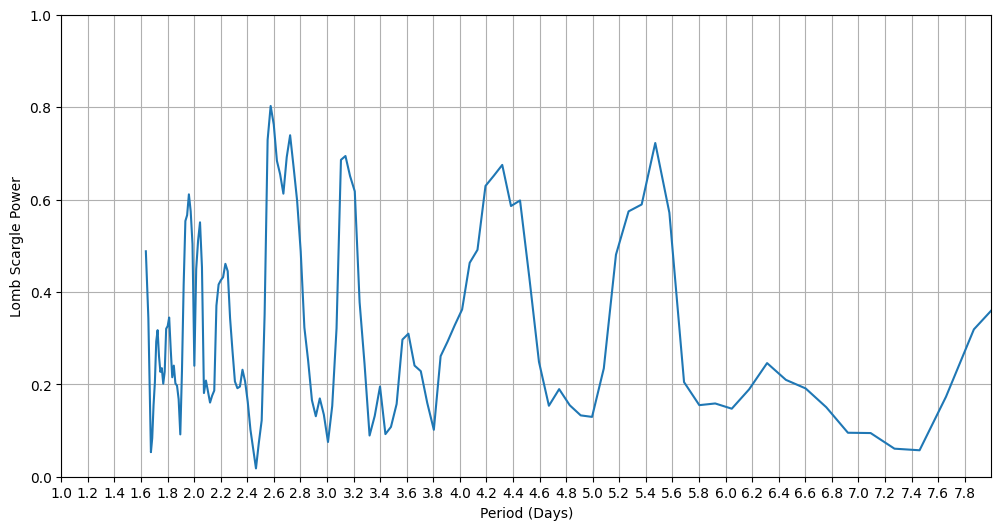

In [12]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/q1_ls, q1_power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [47]:
q1_dict = {"Q1_Period": 1/q1_ls, "Q1_Power": q1_power}

q1_df = pd.DataFrame(q1_dict)
top_power_q1 = q1_df.where(q1_df["Q1_Period"] <= 8).dropna().sort_values(by = "Q1_Power", ascending = False).reset_index().head(5)
top_power_q1
# restrict this so period is between 1-8

,index,Q1_Period,Q1_Power
0,111,2.575964,0.802483
1,110,2.599276,0.762398
2,105,2.722464,0.739120
3,112,2.553067,0.729047
4,52,5.470857,0.722365


# LS on Q2

In [14]:
q2 = df.iloc[np.arange(14,28), :]
q2

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
14,4-3,2458606.098,0.469475,0.228507,0.338302,0.331155,0.454421,0.001773,0.000739,0.001164,0.001360,0.001100,0.37756,0.32341,0.34395,0.41066,0.24199
15,5-1,2458607.941,0.463324,0.229692,0.340361,0.331691,0.449710,0.001023,0.000873,0.001456,0.001689,0.000975,0.22090,0.38022,0.42771,0.50926,0.21682
16,5-3,2458609.941,0.455473,0.228513,0.342103,0.330517,0.450723,0.003129,0.001686,0.001995,0.002303,0.003405,0.68693,0.73766,0.58328,0.69679,0.75541
17,5-4,2458610.961,0.466751,0.228938,0.343888,0.331796,0.446528,0.002097,0.001100,0.001589,0.001087,0.001845,0.44932,0.48052,0.46201,0.32765,0.41318
18,5-5,2458611.983,0.466942,0.228579,0.336604,0.331999,0.455331,0.002647,0.001002,0.002507,0.001948,0.002362,0.56687,0.43855,0.74478,0.58682,0.51869
19,5-6,2458612.941,0.451964,0.229340,0.343427,0.331351,0.447037,0.002090,0.001148,0.001785,0.001780,0.002895,0.46243,0.50038,0.51977,0.53719,0.64750
20,6-2,2458618.095,0.450414,0.228138,0.345348,0.331186,0.446669,0.002595,0.001064,0.002108,0.001426,0.001743,0.57622,0.46622,0.61052,0.43056,0.39032
21,6-4,2458620.095,0.480620,0.229248,0.345806,0.324236,0.452885,0.002347,0.001806,0.002647,0.001699,0.002260,0.48838,0.78766,0.76534,0.52401,0.49893
22,6-5,2458621.095,0.449697,0.230000,0.339266,0.331843,0.450396,0.001896,0.001577,0.002492,0.002381,0.002257,0.42159,0.68550,0.73465,0.71749,0.50111
23,6-7,2458623.095,0.468035,0.232174,0.342716,0.329982,0.445555,0.000815,0.000638,0.000533,0.001235,0.000516,0.17421,0.27462,0.15545,0.37435,0.11588


Text(0, 0.5, 'Normalized Flux')

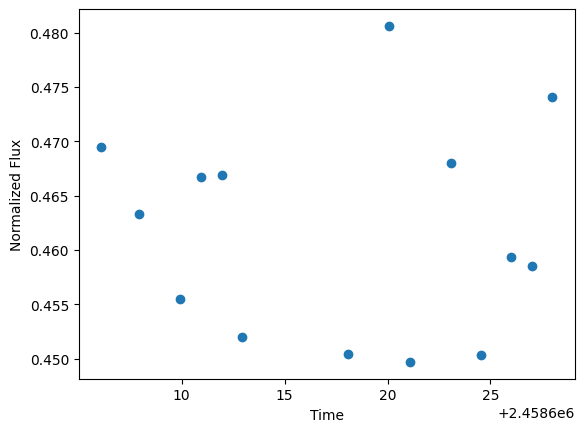

In [15]:
q2_time = q2['JD_UTC'] # time
q2_flux = q2['av_rel_flux T1']  # signal
q2_error = q2['std_T1']

plt.scatter(q2_time, q2_flux)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

In [16]:
q2_ls, q2_power = LombScargle(q2_time, q2_flux, q2_error, nterms = 2).autopower()

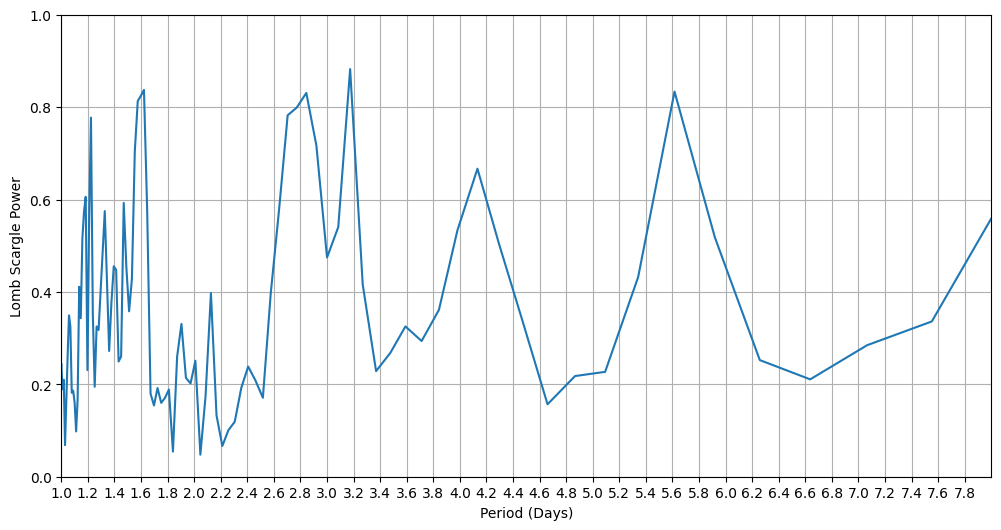

In [17]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/q2_ls, q2_power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [46]:
q2_dict = {"Q2_Period": 1/q2_ls, "Q2_Power": q2_power}

q2_df = pd.DataFrame(q2_dict)
top_power_q2 = q2_df.where(q2_df["Q2_Period"] <= 8).dropna().sort_values(by = "Q2_Power", ascending = False).reset_index().head(5)
top_power_q2

,index,Q2_Period,Q2_Power
0,34,3.174203,0.882281
1,67,1.622370,0.837290
2,19,5.615897,0.833634
3,38,2.844416,0.830709
4,68,1.598686,0.824376


# LS on Q3

In [19]:
q3 = df.iloc[np.arange(28,42), :]
q3

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
28,8-2,2458632.032,0.453177,0.226903,0.338732,0.331907,0.455272,0.002404,0.001089,0.001724,0.001647,0.002038,0.53054,0.48011,0.50896,0.49622,0.44759
29,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
30,10-2,2458637.992,0.456198,0.227476,0.337880,0.332864,0.454329,0.001830,0.001664,0.001114,0.001620,0.001205,0.40120,0.73144,0.32971,0.48661,0.26526
31,10-7,2458642.990,0.452740,0.228530,0.337456,0.331482,0.454998,0.001230,0.000446,0.001267,0.001169,0.001295,0.27167,0.19498,0.37544,0.35252,0.28463
32,10-8,2458643.992,0.454796,0.228414,0.337510,0.331543,0.455023,0.001355,0.000602,0.001035,0.001451,0.001035,0.29795,0.26339,0.30677,0.43759,0.22745
33,10-10,2458645.992,0.442577,0.228112,0.341103,0.327743,0.455774,0.002490,0.002130,0.002871,0.002568,0.002042,0.56256,0.93386,0.84158,0.78361,0.44805
34,11-3,2458649.993,0.465242,0.227964,0.345790,0.329176,0.448786,0.003255,0.001663,0.002342,0.002157,0.002183,0.69970,0.72951,0.67738,0.65534,0.48644
35,11-5,2458652.107,0.445902,0.227540,0.337821,0.332248,0.455046,0.002544,0.001130,0.002019,0.001740,0.001083,0.57045,0.49667,0.59767,0.52381,0.23809
36,11-6,2458652.993,0.468978,0.231599,0.340127,0.325830,0.454329,0.002651,0.001423,0.001744,0.001266,0.000839,0.56537,0.61431,0.51279,0.38843,0.18474
37,11-7,2458653.993,0.448407,0.229115,0.342732,0.326370,0.454091,0.001845,0.001048,0.001798,0.001927,0.000818,0.41137,0.45749,0.52452,0.59035,0.18014


Text(0, 0.5, 'Normalized Flux')

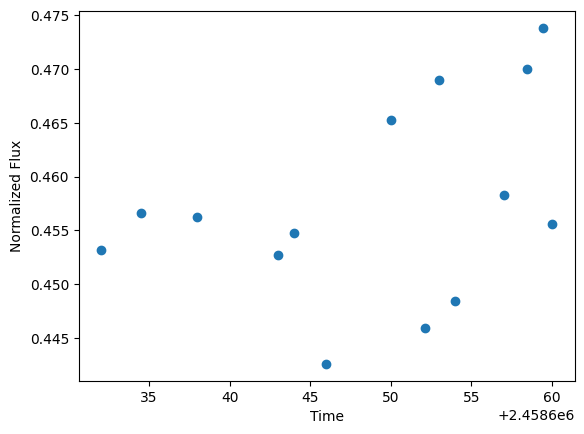

In [20]:
q3_time = q3['JD_UTC'] # time
q3_flux = q3['av_rel_flux T1']  # signal
q3_error = q3['std_T1']

plt.scatter(q3_time, q3_flux)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

In [21]:
q3_ls, q3_power = LombScargle(q3_time, q3_flux, q3_error, nterms = 2).autopower()

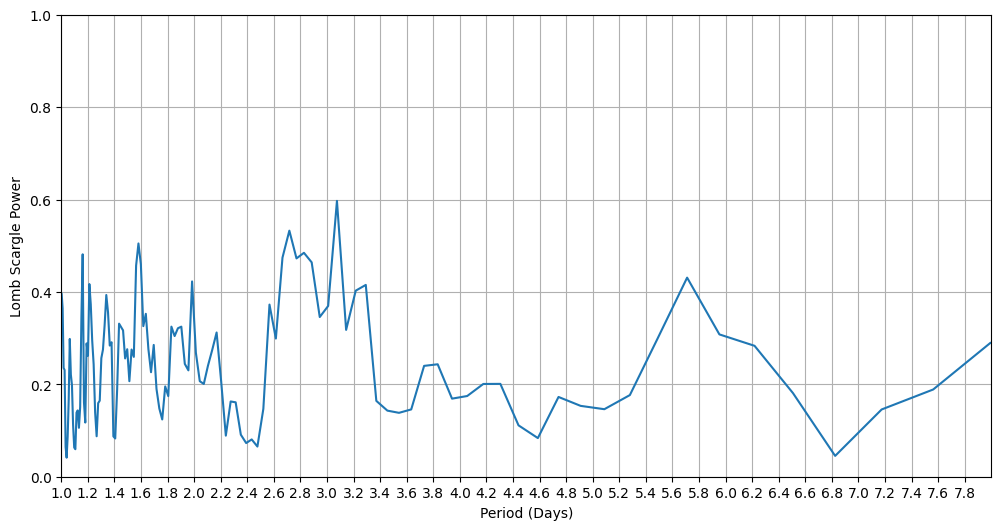

In [22]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/q3_ls, q3_power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [45]:
q3_dict = {"Q3_Period": 1/q3_ls, "Q3_Power": q3_power}

q3_df = pd.DataFrame(q3_dict)
top_power_q3 = q3_df.where(q3_df["Q3_Period"] <= 8).dropna().sort_values(by = "Q3_Power", ascending = False).reset_index().head(5)
top_power_q3

,index,Q3_Period,Q3_Power
0,45,3.074945,0.597065
1,51,2.716699,0.532607
2,149,0.935853,0.527946
3,148,0.942155,0.519587
4,88,1.580904,0.504910


# LS on Q4

In [24]:
q4 = df.iloc[42:, :]
q4

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
42,12-7,2458665.014,0.462008,0.228617,0.336705,0.332126,0.455001,0.001421,0.000869,0.001561,0.001774,0.001855,0.30757,0.38009,0.46348,0.53417,0.40774
43,13-3,2458667.984,0.449977,0.231440,0.341573,0.321844,0.457675,0.001592,0.001567,0.001778,0.002320,0.002167,0.35386,0.67697,0.52039,0.72081,0.47355
44,13-4,2458668.987,0.437679,0.229414,0.339131,0.331817,0.451399,0.003163,0.000871,0.002020,0.002248,0.002885,0.72262,0.37987,0.59558,0.67752,0.63916
45,13-6,2458671.001,0.450836,0.228806,0.338566,0.331306,0.453513,0.001545,0.000885,0.001552,0.001695,0.001554,0.34271,0.38679,0.45851,0.51175,0.34255
46,14-1,2458673.415,0.451254,0.229029,0.339330,0.325437,0.459361,0.003272,0.001841,0.002571,0.001896,0.002580,0.72512,0.80385,0.75778,0.58262,0.56157
47,15-3,2458681.989,0.470068,0.228667,0.338628,0.329200,0.456154,0.001350,0.000791,0.001054,0.001677,0.002047,0.28727,0.34574,0.31112,0.50956,0.44870
48,16-4,2458690.393,0.460358,0.227154,0.339960,0.331751,0.453657,0.003235,0.000749,0.001801,0.000900,0.002753,0.70278,0.32963,0.52991,0.27114,0.60683
49,16-7,2458693.380,0.438034,0.229005,0.341158,0.323510,0.459566,0.003284,0.001044,0.001624,0.002414,0.003501,0.74981,0.45586,0.47611,0.74618,0.76185
50,18-3,2458705.366,0.447426,0.228280,0.338170,0.329261,0.457173,0.001366,0.000867,0.002213,0.002043,0.002419,0.30539,0.37980,0.65431,0.62051,0.52919
51,19-4,2458711.362,0.466107,0.228122,0.337906,0.328054,0.459160,0.001743,0.000746,0.001965,0.001802,0.002299,0.37399,0.32709,0.58140,0.54930,0.50063


Text(0, 0.5, 'Normalized Flux')

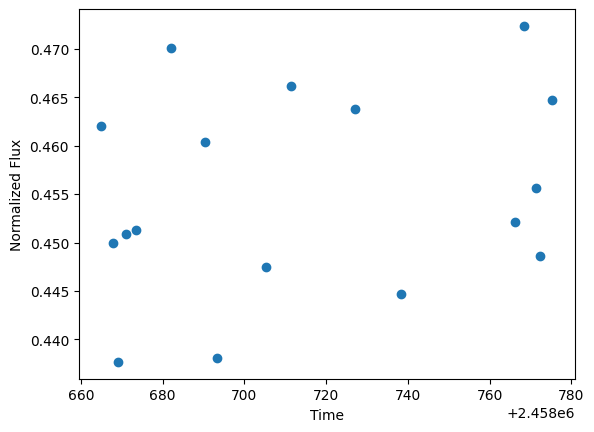

In [25]:
q4_time = q4['JD_UTC'] # time
q4_flux = q4['av_rel_flux T1']  # signal
q4_error = q4['std_T1']

plt.scatter(q4_time, q4_flux)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

In [26]:
q4_ls, q4_power = LombScargle(q4_time, q4_flux, q4_error, nterms = 2).autopower()

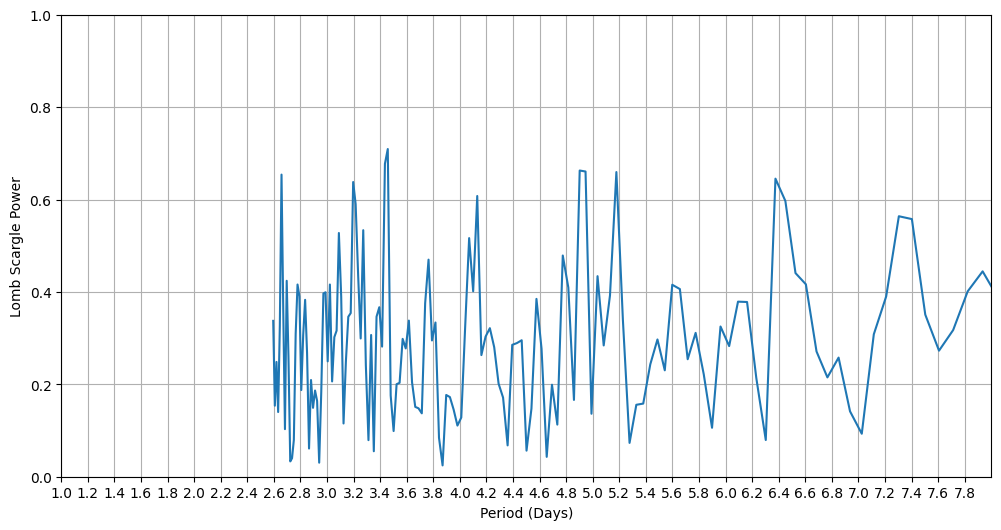

In [27]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/q4_ls, q4_power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [44]:
q4_dict = {"Q4_Period": 1/q4_ls, "Q4_Power": q4_power}

q4_df = pd.DataFrame(q4_dict)
top_power_q4 = q4_df.where(q4_df["Q4_Period"] <= 8).dropna().sort_values(by = "Q4_Power", ascending = False).reset_index().head(5)
top_power_q4

,index,Q4_Period,Q4_Power
0,159,3.457555,0.709271
1,160,3.436012,0.677364
2,112,4.902044,0.662763
3,111,4.946009,0.660648
4,106,5.178216,0.659466


# Top Powers by Quarter

In [48]:
merged_quarters_df = pd.DataFrame({
    
    "Q1_Period": top_power_q1["Q1_Period"], "Q1_Power": top_power_q1["Q1_Power"],
    "Q2_Period": top_power_q2["Q2_Period"], "Q2_Power": top_power_q2["Q2_Power"],
    "Q3_Period": top_power_q3["Q3_Period"], "Q3_Power": top_power_q3["Q3_Power"],
    "Q4_Period": top_power_q4["Q4_Period"], "Q4_Power": top_power_q4["Q4_Power"],
})
merged_quarters_df

,Q1_Period,Q1_Power,Q2_Period,Q2_Power,Q3_Period,Q3_Power,Q4_Period,Q4_Power
0,2.575964,0.802483,3.174203,0.882281,3.074945,0.597065,3.457555,0.709271
1,2.599276,0.762398,1.622370,0.837290,2.716699,0.532607,3.436012,0.677364
2,2.722464,0.739120,5.615897,0.833634,0.935853,0.527946,4.902044,0.662763
3,2.553067,0.729047,2.844416,0.830709,0.942155,0.519587,4.946009,0.660648
4,5.470857,0.722365,1.598686,0.824376,1.580904,0.504910,5.178216,0.659466


In [49]:
merged_quarters_only_period_df = pd.DataFrame({
    
    "Q1_Period": top_power_q1["Q1_Period"],
    "Q2_Period": top_power_q2["Q2_Period"], 
    "Q3_Period": top_power_q3["Q3_Period"], 
    "Q4_Period": top_power_q4["Q4_Period"], 
})
merged_quarters_only_period_df

,Q1_Period,Q2_Period,Q3_Period,Q4_Period
0,2.575964,3.174203,3.074945,3.457555
1,2.599276,1.622370,2.716699,3.436012
2,2.722464,5.615897,0.935853,4.902044
3,2.553067,2.844416,0.942155,4.946009
4,5.470857,1.598686,1.580904,5.178216


In [50]:
# Period: 5.584
# Sub-Period: 2.795
cyg_df_filtered

,Period,Power
177,5.584000,0.534185
354,2.795938,0.517735
355,2.788073,0.482930
353,2.803847,0.427802
176,5.615637,0.355750
356,2.780252,0.338470
320,3.092543,0.281278
178,5.552717,0.276420
352,2.811801,0.275074
641,1.545066,0.267912


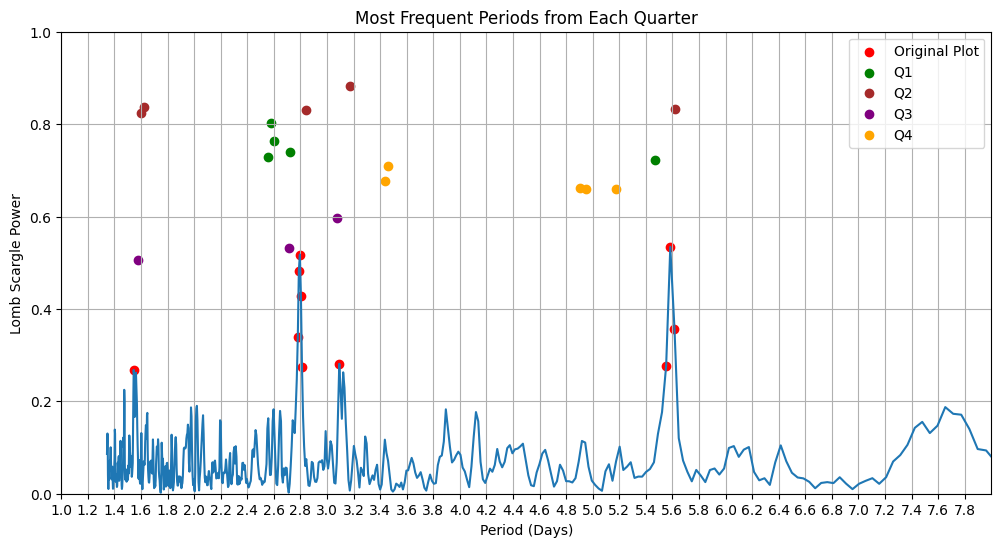

In [52]:
plt.figure(figsize = (12,6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/ls, power)

plt.scatter(cyg_df_filtered["Period"], cyg_df_filtered["Power"], color = "red", label = "Original Plot")

plt.scatter(merged_quarters_df["Q1_Period"], merged_quarters_df["Q1_Power"], color = "green",  label = "Q1")
plt.scatter(merged_quarters_df["Q2_Period"], merged_quarters_df["Q2_Power"], color = "brown", label = "Q2")
plt.scatter(merged_quarters_df["Q3_Period"], merged_quarters_df["Q3_Power"], color = "purple", label = "Q3")
plt.scatter(merged_quarters_df["Q4_Period"], merged_quarters_df["Q4_Power"], color = "orange", label = "Q4")

plt.xticks(np.arange(1, t_end, 0.2))

plt.legend()
plt.title("Most Frequent Periods from Each Quarter")

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

# Fake Sine Wave Generation

In [77]:
c1_flux = df["av_rel_flux C2"]
c2_flux = df["av_rel_flux C3"]
c3_flux = df["av_rel_flux C4"]
c4_flux = df["av_rel_flux C5"]
standardized_time = (time - np.mean(time))/np.std(time)


In [78]:
c1_df = df.loc[:, ["JD_UTC", "av_rel_flux C2"]]


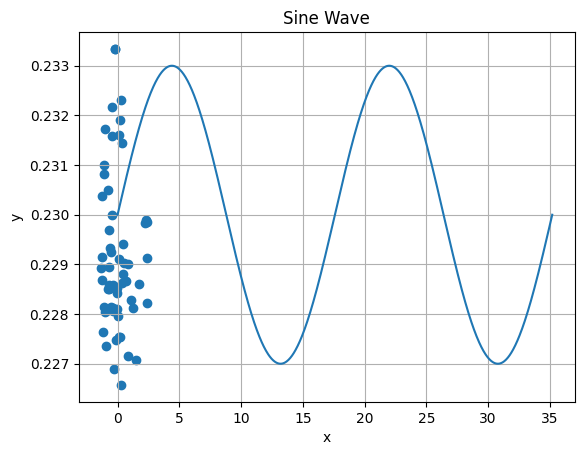

In [83]:
period = 5.6 * np.pi
frequency = 1/period
amplitude = 0.003

x = np.linspace(0, 2 * period, 1000)


y = amplitude*np.sin(2 * np.pi * frequency * x) + 0.23


plt.plot(x, y)
plt.scatter(standardized_time, c1_flux)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

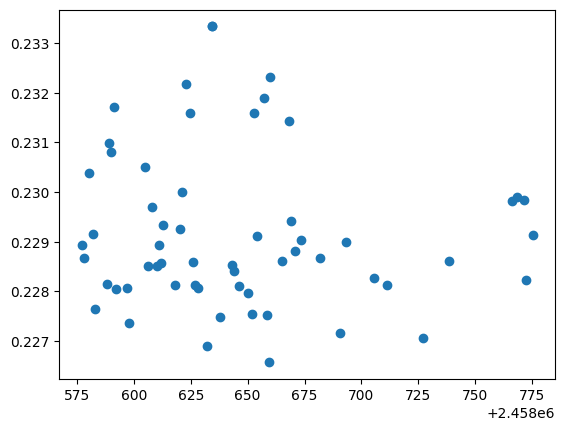

In [81]:
plt.scatter(time, c1_flux)

Text(0, 0.5, 'Flux')

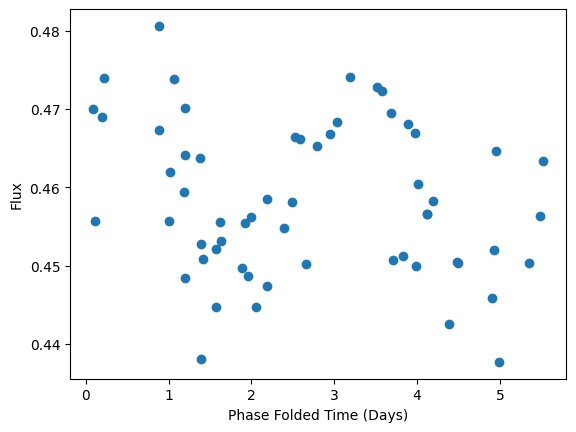

In [85]:
phase_folded_time = time % 5.598
# https://astronomy.stackexchange.com/questions/49579/how-do-i-phase-fold-the-light-curve-for-a-variable-star
# phase folded time is just t % P

plt.figure()

plt.scatter(phase_folded_time, flux)
plt.xlabel("Phase Folded Time (Days)")
plt.ylabel("Flux")